# Studio dell'Effetto Ekman su Correnti Marine del Golfo di Trieste

 .


## 1. Introduzione

Il modello di Ekman, sviluppato da Vagn Walfrid Ekman, descrive il flusso delle correnti marine sotto l'influenza combinata dello stress del vento sulla superficie dell'acqua e della forza di Coriolis, risultante dalla rotazione terrestre. Questo modello è fondamentale per comprendere la dinamica delle correnti superficiali negli oceani, in quanto mostra come le correnti spiraleggiano con la profondità a causa della forza di Coriolis, creando la cosiddetta "spirale di Ekman".

Il comportamento delle correnti a diversa profondità, secondo il modello di Ekman, può essere descritto dalle seguenti equazioni per le componenti Est ($u$) e Nord ($v$) della velocità di corrente:

\begin{equation}
u(z) = u_g + \frac{\sqrt{2}}{\rho f d} e^{z/d} \left[ T_x \cos(z/d - \Phi) - T_y \sin(z/d - \Phi) \right]
\end{equation}

\begin{equation}
v(z) = v_g + \frac{\sqrt{2}}{\rho f d} e^{z/d} \left[ T_x \sin(z/d - \Phi) + T_y \cos(z/d - \Phi) \right]
\end{equation}

Dove:

- $z$: profondità (valori negativi in discesa),
- $u_g$, $v_g$: velocità delle correnti (Est e Nord) geostazionarie di fondo,
- $\rho$: densità del fluido,
- $f = 2 \Omega \sin(\phi)$: parametro di Coriolis, dove:
  - $\Omega = 7,292 \cdot 10^{-5} \ rad/s$ è la velocità angolare di rotazione terrestre,
  - $\phi = 0.795 \ rad$: latitudine del luogo geografico.
- $d$: spessore dello "strato di Ekman",
- $\vec{T} =  \tau \left[ \sin(\theta_0), \cos(\theta_0) \right]$: vettore della tensione superficiale, dove:
  - $\tau$: tensione superficiale esercitata dal vento,
  - $\theta_0$: angolo di direzione del vento.
- $\Phi$: angolo di deflessione della corrente superficiale rispetto al vento.

Il percorso di indagine inizia con l'analisi di un set di dati raccolti dalla boa oceanografica VIDA, della Stazione di Biologia Marina di Pirano. L'obiettivo è approfondire la comprensione dei risultati misurati, utilizzando le tecniche di rappresentazione e modellizzazione apprese durante il corso.



## 2. Dataset Sperimentale

Per la verifica del modello è stato studiato l'evento di **bora** che si è verificato tra le **00:00 del 7 gennaio 2024** e le **23:59 del 9 gennaio 2024**. Durante questo periodo, è stato osservato un vento approssimativamente costante con:

- **Direzione (SW)**: $ \theta_0 = \frac{4}{3} \pi $
- **Velocità**: $ w = 12.9 \, \text{m/s} $

Questo evento è stato utilizzato per verificare il comportamento delle correnti superficiali nel modello di Ekman.

### Estrazione e Filtraggio dei Dati

I dati sono stati estratti dal file `.csv` fornito dal centro sperimentale, che includeva diverse **misure delle velocità delle correnti Est e Nord** a profondità comprese tra i 2 e i 22 metri dal fondale (con un'altezza totale di 23 metri).
Il file è stato caricato in un **DataFrame** ed stato filtrato per selezionare solo i dati relativi alle profondità comprese tra i 2 e i 19 metri, escludendo i dati alle estremità della colonna d'acqua. Inoltre, per garantire uniformità nelle condizioni analizzate, sono stati considerati solo i dati che rientravano in una deviazione standard dalla media di **Intensità** e **Direzione** del vento.

Si osserva che i dati forniti per la direzione del vento indicando la direzione di provenienza; si è adottata quindi la convenzione per cui l'intensità dello sforzo è definita positiva e l'angolo di direzione è sfasato di 180° rispetto a quello fornito.

In [4]:
import pandas as pd
import numpy as np

# Definizione degli estremi considerati per l'altezza dal fondale
h0 = 2    # Altezza iniziale dal fondale
hf = 19   # Altezza finale dal fondale

# CREAZIONE DEL DATAFRAME

df = pd.read_csv("/Users/kevin/Desktop/Esame-TRDM/Ekman-2to20m.csv")

# Filtraggio in base al vento
mMWS, devMWS = df['Mean Wind Speed'].mean(), df['Mean Wind Speed'].std()
mMWD, devMWD = df['Mean Wind Direction'].mean(), df['Mean Wind Direction'].std()

df_cut = df[(abs(df['Mean Wind Speed'] - mMWS) < devMWS) & 
            (abs(df['Mean Wind Direction'] - mMWD) < devMWD)]


In [5]:
df_cut.round(2)

print(f'Velocità media = {mMWS:.2f} m/s', f'Direzione media = {(mMWD + 180)/180 * np.pi:.2f} rad')

Velocità media = 12.87 m/s Direzione media = 4.13 rad


##  3. Analisi dei Dati Sperimentali

Le velocità $u$ e $v$ delle correnti, misurate a diverse altezze, sono state campionate dalla boa VIDA ogni 30 minuti nell'intervallo di tempo considerato. Poiché il modello descrive correnti stazionarie nel tempo e le **condizioni del vento sono considerabili stabili durante questo periodo**, è stata calcolata la velocità media nelle direzioni Est e Nord, al fine di confrontarla in modo coerente con le previsioni del modello.

In [8]:
# CALCOLO DELLA MEDIA DELLE CORRENTI

meanN = np.array([df_cut[f'CurrentN ({i} m)'].mean() for i in range(h0, hf+1)])
meanE = np.array([df_cut[f'CurrentE ({i} m)'].mean() for i in range(h0, hf+1)])
h = np.arange(h0, hf+1, 1)  # altezza dal fondale

meanN = meanN[::-1]  # Inversione dell'array della corrente Nord 
meanE = meanE[::-1]  # Inversione dell'array della corrente Est
h = h[::-1]          # Inversione dell'altezza

data = pd.DataFrame({
    'Altezza dal fondale (m)': h,
    'Velocità media Corrente Nord (m/s)': meanN,
    'Velocità media Corrente Est (m/s)': meanE})

In [9]:
data.round(1)


,Altezza dal fondale (m),Velocità media Corrente Nord (m/s),Velocità media Corrente Est (m/s)
0,19,0.2,-6.8
1,18,1.0,-6.0
2,17,1.6,-5.5
3,16,1.2,-5.0
4,15,1.6,-5.1
5,14,1.3,-4.2
6,13,2.1,-4.4
7,12,1.9,-4.2
8,11,2.5,-3.4
9,10,1.8,-3.7


Per visualizzare meglio i dati, le correnti medie sono state plottate **in funzione dell'altezza dal fondale**.

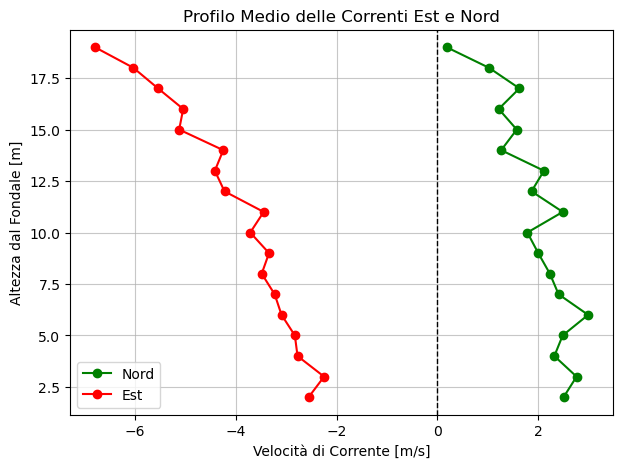

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(meanN, h, marker='o', linestyle='-', color='green', label='Nord')
plt.plot(meanE, h, marker='o', linestyle='-', color='red', label='Est')
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Linea verticale sull'asse Y=0
plt.xlabel("Velocità di Corrente [m/s]")
plt.ylabel("Altezza dal Fondale [m]")
plt.title("Profilo Medio delle Correnti Est e Nord")
plt.legend(loc='lower left')
plt.grid(True, alpha=0.7)
plt.show()

In modo analogo, si procede rappresentando i valori misurati sul **piano 2D**, distinguendo i punti in base alla loro profondità.
Questo risulta particolarmente utile per poter visualizzare l'effetto di Ekman.

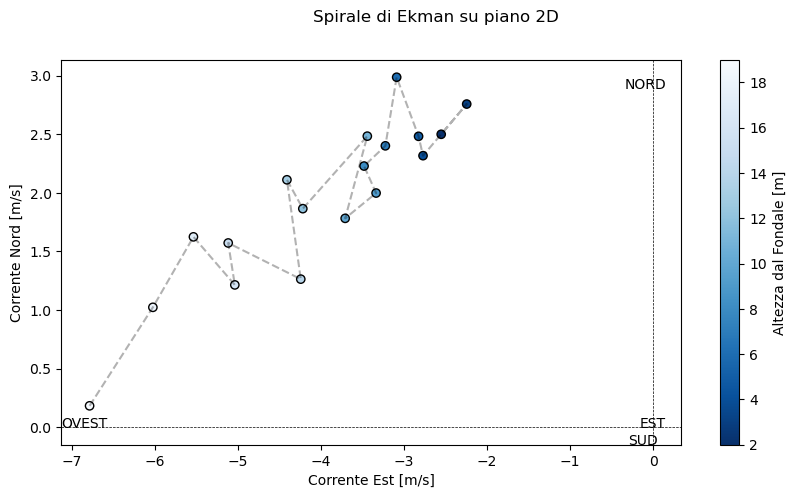

In [13]:
plt.figure(figsize=(10, 5))
plt.suptitle("Spirale di Ekman su piano 2D")

plt.scatter(meanE, meanN, c=h, cmap='Blues_r', marker='o', alpha=1, edgecolors='black')
plt.colorbar(label='Altezza dal Fondale [m]')
plt.plot(meanE, meanN, color='black', linestyle='--', alpha=0.3)

plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  

plt.xlabel("Corrente Est [m/s]")
plt.ylabel("Corrente Nord [m/s]")
plt.draw()  

xlim = plt.xlim()
ylim = plt.ylim()

plt.text(-0.35, ylim[1]-0.25, "NORD", color='black', fontsize=10) 
plt.text(-0.3, ylim[0], "SUD", color='black', fontsize=10)
plt.text(xlim[1] -0.5, 0, "EST", color='black', fontsize=10)
plt.text(xlim[0], 0, "OVEST", color='black', fontsize=10) 

plt.show()

Infine, per visualizzare in modo chiaro il modulo e direzione della velocità risultante, è stato creato un **grafico vettoriale** in 3D.

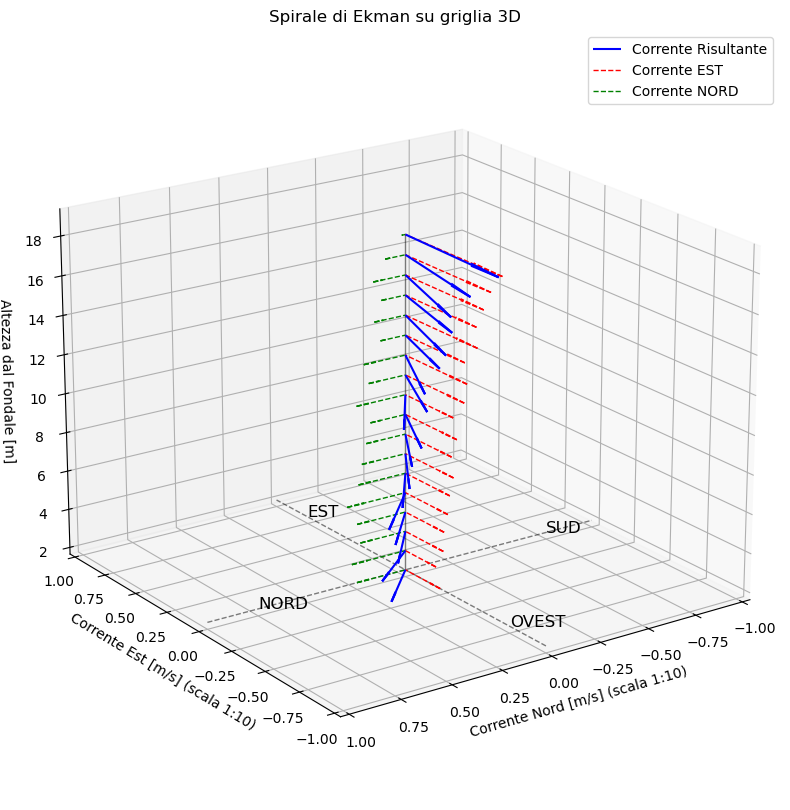

In [15]:
n_points = hf - h0 + 1 #Numero di Misure per componente
x, y = np.zeros(n_points), np.zeros(n_points)

plt.style.use('default')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_title("Spirale di Ekman su griglia 3D")

# Vettore totale: ORA (N, E, h) 
q_res = ax.quiver(x, y, h, meanN, meanE, np.zeros_like(x), color='blue', 
                  length=0.1, linewidth=1.5, pivot='tail', label='Corrente Risultante')

# Componente Nord: vettore (N, E, h)
q_est = ax.quiver(x, y, h, np.zeros_like(x), meanE, np.zeros_like(x), color='red', 
                  length=0.1, linewidth=1, linestyle='--', pivot='tail', label='Corrente EST')

# Componente Est: vettore (N, E, h)
q_nord = ax.quiver(x, y, h, meanN, np.zeros_like(x), np.zeros_like(x), color='green', 
                   length=0.1, linewidth=1, linestyle='--', pivot='tail', label='Corrente NORD')

ax.plot([0, 0], [0, 0], [h0, hf], color='black', alpha=0.5, linewidth=1)
ax.plot([0, 0], [-1, 1], [h0, h0], color='black', alpha=0.5, linewidth=1, linestyle='--')
ax.plot([1, -1], [0, 0], [h0, h0], color='black', alpha=0.5, linewidth=1, linestyle='--')

ax.set_xlim(1, -1)
ax.set_ylim(-1, 1)
ax.set_zlim(h0, hf)

ax.set_ylabel("Corrente Est [m/s] (scala 1:10)")
ax.set_xlabel("Corrente Nord [m/s] (scala 1:10)")
ax.set_zlabel("Altezza dal Fondale [m]")

ax.legend()

ax.view_init(elev=20, azim=235)

ax.text(0.75, 0, h0, "NORD", color='k', fontsize=12)
ax.text(-0.75, 0, h0, "SUD", color='k', fontsize=12)
ax.text(0, 0.75, h0, "EST", color='k', fontsize=12)
ax.text(0, -0.75, h0, "OVEST", color='k', fontsize=12)

plt.show()

## 4. Implementazione del Modello

Una volta preparati e visualizzati i dati sperimentali, si passa alla fase successiva, in cui vengono introdotti i parametri e le funzioni che descrivono il sistema.

In primo luogo si definiscono le **grandezze fisiche** associate all'evento e al luogo geografico di Pirano, utili per adattare il modelo all'ambiente considerato:

In [18]:
theta_0 = (mMWD + 180)/180 * np.pi  # direzione del vento
phi = 0.795         # rad, Latitudine
Omega = 7.292e-5    # rad/s
f = 2*Omega*np.sin(phi)  # Forza di Coriolis
rho = 1026        # kg/m^3 densità del fluido
H = 23            # m profondità del fondale

Successivamente, viene definita la **funzione `vel`**, che, utilizzando le equazioni teoriche, calcola le componenti Est e Nord della velocità in funzione della profondità e dei parametri del sistema. 

Questo consente di confrontare i risultati teorici con i dati misurati, permettendo di verificare l'accuratezza e la validità del modello di Ekman nelle specifiche condizioni osservate.

In [20]:
def vel(z, tau, d, Phi, ug, vg):  
    T = [tau*np.cos(theta_0), tau*np.sin(theta_0)]
    arg = (z/d - Phi)
    u = ug + (np.sqrt(2) / (rho*f*d)) * np.exp(z/d) * (T[0]*np.cos(arg) - T[1]*np.sin(arg))
    v = vg + (np.sqrt(2) / (rho*f*d)) * np.exp(z/d) * ( T[0]*np.sin(arg) + T[1]*np.cos(arg))
    return np.array([u, v])

### Test del Modello con Parametri Caratteristici


Per visualizzare la legge teorica, sono state calcolate le correnti teoriche utilizzando parametri caratteristici che danno luogo alla Spirale di Ekman. Questo approccio permette di **osservare il fenomeno previsto**, adottando le stesse modalità utilizzate nella sezione precedente, così da poter confrontare direttamente i risultati del modello con i dati misurati.

In [23]:
# Parametri di test
tau = 8  # N
d = 16   # m
Phi = 0.55  # rad
ug = -1  # m/s
vg = 1  # m/s

# Creazione della tupla con i parametri di test
test_params = (tau, d, Phi, ug, vg)

Attraverso la funzione che implementa il modello, si procede al calcolo delle aspettative teoriche in base ai parametri fissati. Poiché i dati sono stati rilevati a partire dall'altezza dal fondale, mentre il modello è definito in funzione della profondità rispetto al livello del mare, è necessario convertire l'altezza in profondità per garantire la coerenza tra i dati e il modello.

In [25]:
h = np.arange(h0, hf+1, 1)  # Altezza dal fondale
h = h[::-1]                 # Inversione dell'array delle altezze
z = h - H                   # profondità dal livello del mare

current = np.zeros((len(h), 2))
for i in range(len(h)):
    current[i, :] = vel(z[i],*test_params)
    
qE, qN = current[:, 0], current[:, 1]    # Calcolo delle correnti teoriche

Utilizzando lo stesso metodo di visualizzazione dei dati, riportato nella sezione precedente, si ottiene:

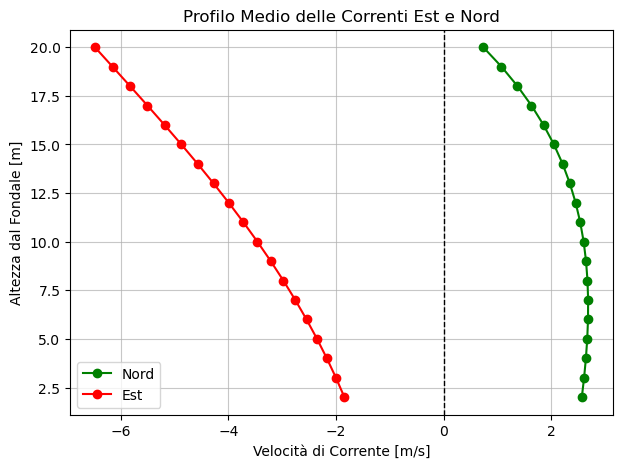

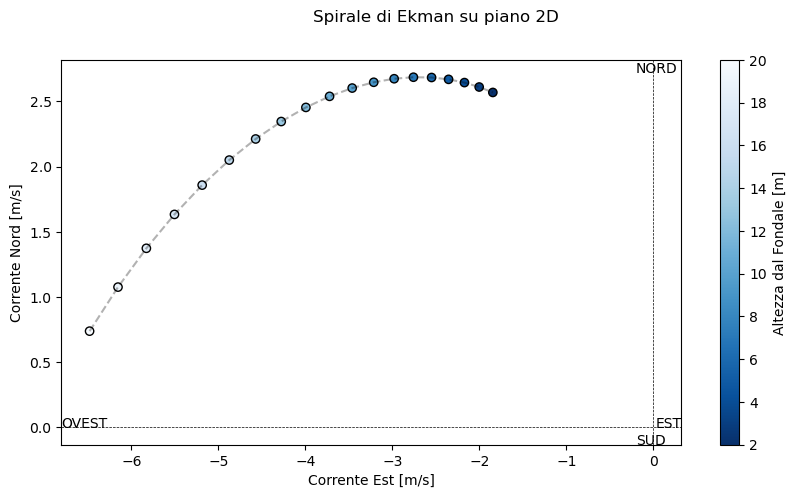


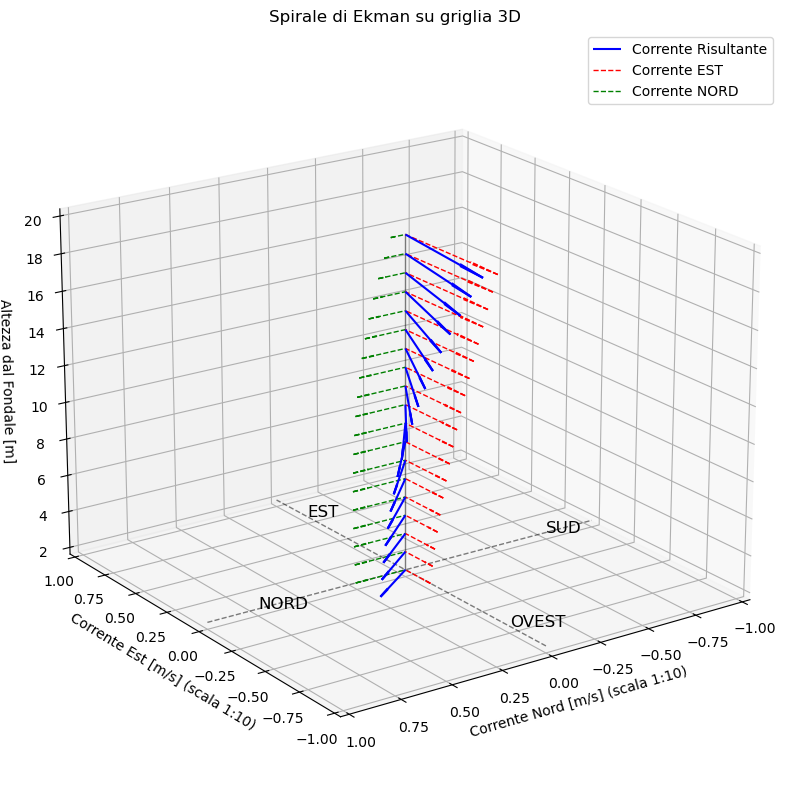


Confrontando in prima istanza i risultati sperimentali con quelli teorici, si osserva una buona corrispondenza tra gli andamenti, sebbene nel caso reale siano presenti inevitabili fluttuazioni. Il modello teorico produce una curva ideale che, per **$ z \rightarrow -\infty $**, tende al punto $(-1, 1)$ in base alle relative velocità di fondo $(u_g, v_g)$; man mano che la profondità aumenta, l'intensità della corrente risultante diminuisce, tendendo a zero. Noto che la profondità è limitata dalle condizioni fisiche del sistema, la **spirale risulta troncata**.

Inoltre, si evidenzia come l'angolo **$\Phi$** determini lo sfasamento tra la direzione del vento e quella della corrente superficiale, mentre il parametro **$d$** regola lo spessore della zona in cui l'effetto di Ekman risulta significativo.


## 5. Inferenza Bayesiana e Confronto Misura-Modello

In questa sezione si utilizza un **approccio bayesiano** per valutare i dati sperimentali in relazione al modello teorico. L'obiettivo è esplorare lo spazio dei parametri associati alle condizioni di misura, così da poter adattare la legge di Ekman ai dati rilevati.

Poiché l'errore associato alle misurazioni effettuate dalla boa VIDA non è noto, si adotta un approccio basato sulla simulazione statistica: ogni valore della velocità della corrente è soggetto a una **fluttuazione gaussiana**, con una dispersione di $\sigma = 0.5 \, \text{m/s} $.


In [105]:
np.random.seed(42) # Seme impostato per la riproducibilità della simulazione
errE = 0.5*np.ones(hf-h0+1) # Errore sulla misura in direzione Est
errN = errE # Errore sulla misura in direzione Nord

Ricordando il **Teorema di Bayes**, relativo alla probabilità condizionata, nella sua interpretazione secondo l'inferenza bayesiana: 

\begin{equation}
P(p|d M) = \frac{P(d|p M) \cdot P(p|M)}{P(d|M)}
\end{equation}




Si procede a determinare la distribuzione **a posteriori** dei parametri del modello, vincolando lo spazio dei parametri a $(\tau, d, \Phi, u_g, v_g)$ associati alla legge teorica proposta. In questo contesto, per il dato campione di misurazioni, la distribuzione dei parametri (**Posterior**) risulta essere proporzionale al prodotto di:

- **Likelihood**: rappresenta la distribuzione dei dati secondo il modello, condizionata a un particolare set di parametri. Essa quantifica la probabilità di osservare il campione misurato dato un insieme specifico di valori parametrici.
- **Prior**: esprime la distribuzione a priori dei parametri, incorporando le conoscenze sul sistema, basate su principi fisici e ipotesi teoriche note prima dell'esperienza.

Unendo l'informazione derivante dai dati (attraverso la likelihood) e quella nota a priori (attraverso il prior), si ottiene una stima completa della distribuzione dei parametri. Questo approccio consente di studiare come sono distribuiti i parametri del sistema misurato e di verificare la coerenza delle ipotesi di Ekman con il comportamento osservato.

**Operativamente**, per facilitare i calcoli, si è definito il logaritmo delle suddette funzioni di distribuzione, noto che è una funzione monotona crescente.

In [36]:
def log_prior(theta_params):
    tau, d, Phi, ug, vg = theta_params
    if 0 < tau < 25 and 0 < d < H and -2.5 < ug < 2.5 and -2.5 < vg < 2.5:
        return 0.0
    return -np.inf

Il prior assunto è stato definito come una distribuzione uniforme, vincolando il posterior allo spazio dei parametri che corrispondono a soluzioni fisiche, senza modificarne l'andamento. In particolare, sono stati imposti i seguenti limiti:
- $ \tau > 0 \, \text{N}$: il modulo della tensione, derivante dallo stress del vento sulla superficie, deve essere positivo;
- $ \tau < 25 \, \text{N}$ : l'intensità della tensione è limitata a 25 N, per evitare valori eccessivi;
- $ 0 < d < H = 23 \, \text{m}$ : lo spessore dello "Strato di Ekman" è vincolato alla profondità del fondale;
- $ -2.5 < u_g, v_g < 2.5 \, \text{m/s}$ : le velocità delle correnti geostazionarie sono limitate all'intervallo, in accordo con valori tipici osservati nel Golfo di Trieste



In [38]:
def log_likelihood(theta_params, z, current, errE, errN):
    tau, d, Phi, ug, vg = theta_params
    mod = vel(z, tau, d, Phi, ug, vg)
    resE = current[:, 0] - mod[0, :]
    resN = current[:, 1] - mod[1, :]
    chi2_val = np.sum((resE / errE)**2 + (resN / errN)**2)
    return -0.5 * chi2_val

La likelihood del modello viene definita come la congiunta delle distribuzioni di probabilità relative a ciascuna misura. Avendo assunto un errore statistico gaussiano, ogni misura $i$ è indipendente e segue una distribuzione normale $N(mod_i; err_i)$, dove $mod_i$ è il valore medio predetto dal modello di Ekman (implementato precedentemente) e $err_i$ rappresenta l'errore associato alla misura.

Il logaritmo della likelihood, per una distribuzione multivariata di dati indipendenti, risulta essere proporzionale al $\chi^2$ associato:
$$
\log \mathcal{L} \propto -\frac{1}{2}\chi^2.
$$

Inoltre, poiché le misurazioni delle componenti Est e Nord sono effettuate in maniera indipendente, la likelihood totale si esprime come la somma dei logaritmi delle singole likelihood:
$$
\log \mathcal{L} = \log \mathcal{L}_E + \log \mathcal{L}_N.
$$

Nonostante le due grandezze siano misurate indipendentemente, esse condividono tre dimensioni nello spazio dei parametri del modello. In questo modo, si sfrutta al massimo l'informazione contenuta nei dati per stimare con precisione i parametri del sistema secondo le ipotesi di Ekman.


In [40]:
def log_posterior(theta_params, z, current, errE, errN):
    lp = log_prior(theta_params)
    if not np.isfinite(lp): # In questo modo è calcolato solo nella regione non nulla del Prior
        return -np.inf
    return lp + log_likelihood(theta_params, z, current, errE, errN)

### Algoritmo MCMC: Studio dello Spazio dei Parametri con Emcee

Una volta determinata la distribuzione a posteriori sul campione misurato, si procede allo studio dello spazio dei parametri. Per questo scopo è stata impiegata una delle implementazioni del campionamento Markov Chain Monte Carlo (MCMC): `emcee`. Questo strumento utilizza un approccio di **ensemble sampling** che migliora l'efficienza del campionamento, specialmente in problemi a elevata dimensionalità.

Fissato un punto di partenza per l'algoritmo e definito un numero adeguato di **walkers**, questi si muovono nello spazio dei parametri campionandolo. In particolare, il movimento di ciascuno dipende dalla posizione degli altri, in modo che tutte le regioni dello spazio vengano esplorate. La direzione preferenziale del movimento è quella che incrementa la log-likelihood, permettendo di focalizzarsi sulle regioni del posterior più probabili. Infine si ricavano le **distribuzioni marginali del posterior**, nonchè distribuzioni dei singoli parametri per il campione fissato.


In [43]:
from scipy.optimize import minimize

current[:, 0], current[:, 1] = meanE, meanN #Ridefinisco la variabile Current con i dati rilevati

# Parametri iniziali (ipotesi)

theta_init = np.array([15.1, 22.8, 0.8, 0.3, -0.5])
print("Log-likelihood (ipotesi):", log_likelihood(theta_init, z, current, errE, errN))

#Minimizzazione per ottenere un buon punto iniziale

np.random.seed(42) # Seme impostato per la riproducibilità della simulazione
def nll(params, z, current, errE, errN):
    return -log_posterior(params, z, current, errE, errN)

initial = theta_init*(1 + 0.1 * np.random.randn(5))

soln = minimize(nll, initial, args=(z, current, errE, errN))
print("Soluzione minimizzazione:", soln.x)
print("Log-likelihood nel massimo:", log_likelihood(soln.x, z, current, errE, errN))

Log-likelihood (ipotesi): -48.93552009980282
Soluzione minimizzazione: [15.3124966  22.97532139  0.90880285  0.68489967 -0.20602345]
Log-likelihood nel massimo: -10.571982370738658


C:\Users\kevin\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\kevin\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\kevin\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


La scelta del **punto di partenza** viene effettuata massimizzando `log_posterior` , in modo che i walker inizino in prossimità delle regioni di massima probabilità dei parametri.

Per ottenere questo risultato, si utilizza la funzione `minimize` della libreria `scipy.optimize`, andando a minimizzare `-log_posterior`.

In [45]:
nparams = len(theta_init)

import emcee

# Inizializzazione dei walker per il campionamento MCMC

np.random.seed(42) # Seme impostato per la riproducibilità della simulazione
nwalkers = 24
ndim = nparams
pos = soln.x + 1e-3 * np.random.randn(nwalkers, ndim)

# MCMC con emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,
                                args=(z, current, errE, errN))
sampler.run_mcmc(pos, 8000, progress=True);

100%|██████████| 8000/8000 [00:29<00:00, 271.69it/s]


Per l'utilizzo dell'algoritmo, sono stati impostati i seguenti parametri:

- **nwalkers** = 24, seguendo lo standard $N = 4(n_{dim} + 1)$;
- **pos**: posizioni iniziali generate in modo casuale attorno al punto di massimo precedentemente individuato;
- **nsteps** = 8000, un numero ritenuto adeguato per il problema in esame, tale da garantire una sufficiente esplorazione dello spazio dei parametri.

Per visualizzare l'andamento dei campionatori, si è graficato il **tarce plot**, che raffigura le catene MCMC relative ai parametri.


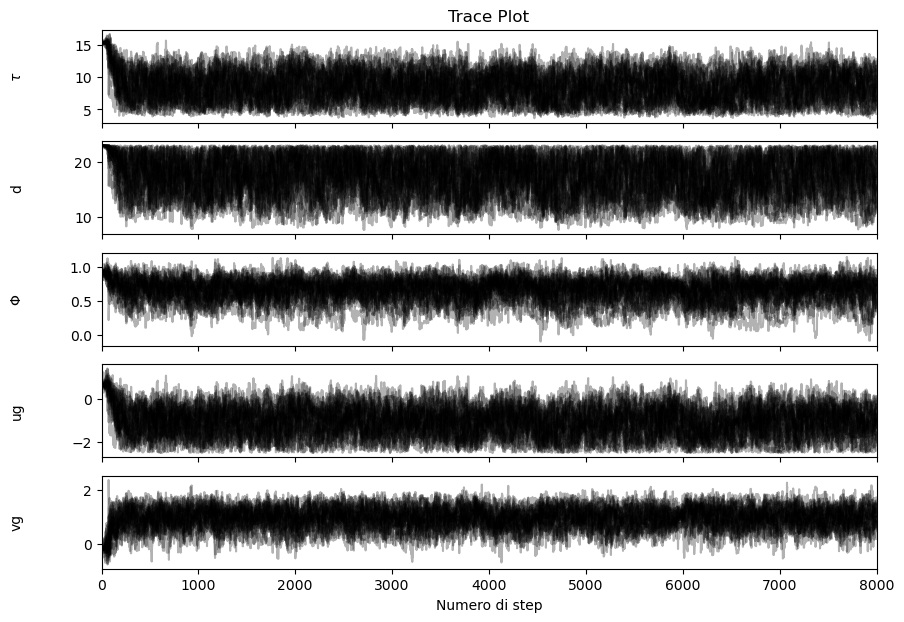

In [47]:
samples = sampler.get_chain() # Raccoglie i campionati
 
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
labels = ['$\\tau$', 'd', '$\\Phi$', 'ug', 'vg']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("Numero di step")
axes[0].set_title("Trace Plot")
plt.show()

Per verificare l'affidabilità dei walkers, si calcola il **tempo di autocorrelazione** (t) delle catene MCMC. Questo parametro indica il numero di passi necessari affinché un walker diventi indipendente dalla sua posizione precedente, assicurando così un'esplorazione omogenea dello spazio dei parametri senza zone eccessivamente correlate.

Una volta determinato il tempo di autocorrelazione per ciascun parametro, si adotta il seguente criterio:
$$
n_{step} > 50 \cdot \max(t),
$$
ossia il numero di passi deve essere almeno 50 volte superiore al massimo tempo di autocorrelazione tra i parametri, per garantire un campionamento robusto e indipendente.


In [49]:
t_autocorr = sampler.get_autocorr_time()
print("Tempi di autocorrelazione:", t_autocorr)

Tempi di autocorrelazione: [133.50694631 139.50119047 133.37129094 130.43238938 105.18388309]


Noti i valori campionati per ciascun parametro, si procede a rappresentarli tramite istogrammi per evidenziare le distribuzioni marginali del Posterior.

A questo scopo, viene utilizzata la libreria `pygtc`, che permette di creare un **Triangle Plot**: questo grafico non solo mostra gli istogrammi per ogni parametro, ma calcola anche le distribuzioni congiunte per ogni coppia di parametri, evidenziando così le correlazioni tra di essi.


Removed no burn in


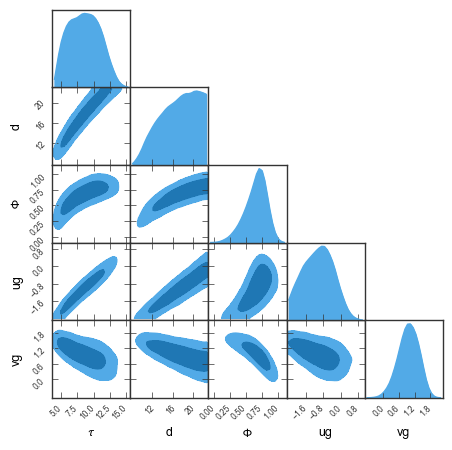

In [51]:
from getdist import MCSamples
import pygtc

flat_samples = sampler.get_chain(discard=500, flat=True) # Si ottiene una matrice dei valori campionati per parametro
pygtc.plotGTC(chains=flat_samples,
              paramNames=['$\\tau$', 'd', '$\\Phi$', 'ug', 'vg'],
              figureSize='MNRAS_page')
samples_mcs = MCSamples(samples=flat_samples, names=labels, labels=labels) 

La fase iniziale del campionamento, detta **burn-in**, rappresenta il periodo in cui i campionatori esplorano lo spazio dei parametri partendo dal punto iniziale ipotizzato, fino a stabilizzarsi intorno ai valori ottimali. Poiché le prime iterazioni sono fortemente influenzate dal punto di partenza, vengono scartate per garantire che la distribuzione a posteriori stimata non sia contaminata da questa fase transitoria.

In questo studio, osservando il corner plot, è stato deciso di eliminare i dati relativi ai primi 500 passi (impostando `discard=500`).


### Fit dei Dati sul Modello Assunto

Per quanto detto nelle sezioni precedenti, i **valori stimati per il sistema** misurato risultano essere quelli che massimizzano il Posterior. Noto che il triangle plot mostra distribuzioni asimmetriche, l'incertezza associata è stata calcolata tramite i percentili.

In [55]:
means, best_fits, inc = np.zeros(ndim), np.zeros(ndim), np.zeros((ndim,2))

log_like = sampler.get_log_prob(discard=500, flat=True)
best_index = np.argmax(log_like) # Indice di best_fit
lw = np.percentile(flat_samples, 16, axis=0) # Calcolo dei percentili per l'incertezza
up = np.percentile(flat_samples, 84, axis=0)

for i in range(ndim): # Stima dei parametri migliori
    means[i] = np.mean(flat_samples[:, i])
    best_fits[i] = flat_samples[best_index, i]
    inc[i,0] = best_fits[i] - lw[i]
    inc[i,1] = up[i] - best_fits[i]

# Creazione del DataFrame con gli intervalli di credibilità

df_bf = pd.DataFrame({
    'Parametro': labels,
    'Valore Stimato': best_fits,
    'Incertezza -': inc[:, 0],  # Errore inferiore
    'Incertezza +': inc[:, 1],  # Errore superiore
    'UdM': ['$N$', '$m$', '$rad$', '$m/s$', '$m/s$']
})

In [56]:
df_bf.round(2)

,Parametro,Valore Stimato,Incertezza -,Incertezza +,UdM
0,$\tau$,7.46,1.49,3.62,$N$
1,d,15.74,2.49,5.55,$m$
2,$\Phi$,0.61,0.12,0.20,$rad$
3,ug,-1.29,0.52,0.94,$m/s$
4,vg,1.09,0.51,0.26,$m/s$


Ottenuti i parametri che descrivono il sistema, si paragonano i dati misurati e il modello stimato tramite **confronto grafico**.

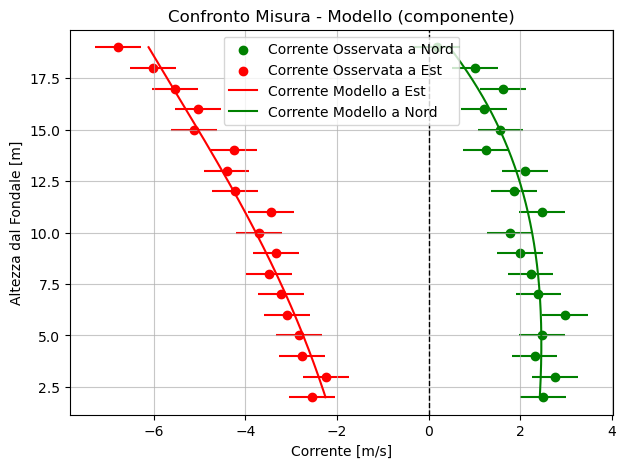

In [58]:
z_range = -np.arange(H - hf, H - h0 + 0.01, 0.01)
Mod_vel = vel(z_range, *best_fits)
ModE, ModN = Mod_vel[0, :], Mod_vel[1, :]
Modh = np.arange(h0, hf + 0.01, 0.01)[::-1]

plt.figure(figsize=(7, 5))
plt.scatter(meanN, h, marker='o', color='green', label='Corrente Osservata a Nord')
plt.scatter(meanE, h, marker='o', color='red', label='Corrente Osservata a Est')
plt.plot(ModE, Modh, linestyle='-', color='red', label='Corrente Modello a Est')
plt.plot(ModN, Modh, linestyle='-', color='green', label='Corrente Modello a Nord')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Corrente [m/s]")
plt.ylabel("Altezza dal Fondale [m]")
plt.title("Confronto Misura - Modello (componente)")
plt.errorbar(meanN, h, xerr=abs(errN), fmt='*', color='green', zorder=0)
plt.errorbar(meanE, h, xerr=abs(errE), fmt='*', color='red', zorder=0)
plt.legend()
plt.grid(True, alpha=0.7)
plt.show()

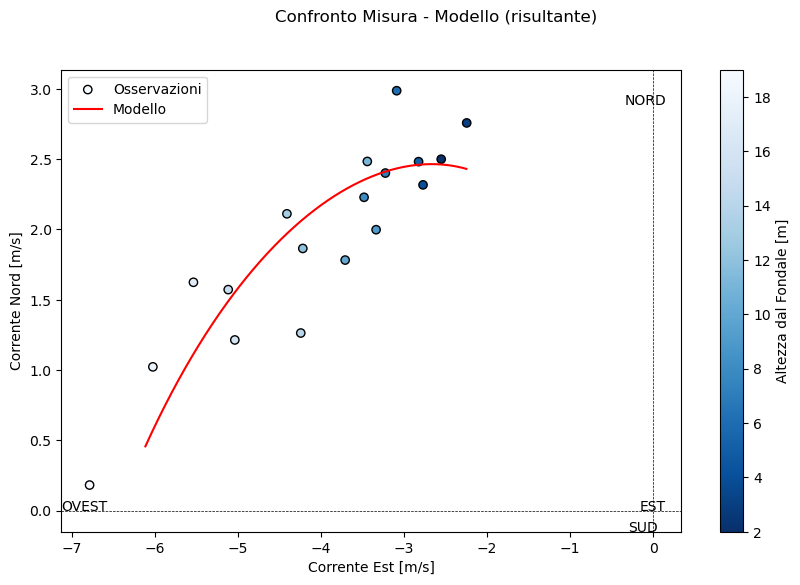

In [59]:
plt.figure(figsize=(10, 6))
plt.suptitle("Confronto Misura - Modello (risultante)")
plt.scatter(meanE, meanN, c=h, cmap='Blues_r', marker='o', alpha=1,
            label='Osservazioni', edgecolors='black')
plt.colorbar(label='Altezza dal Fondale [m]')
plt.plot(ModE, ModN, color='red', linestyle='-', alpha=1, label='Modello')
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel("Corrente Est [m/s]")
plt.ylabel("Corrente Nord [m/s]")

xlim = plt.xlim()
ylim = plt.ylim()
plt.text(-0.35, ylim[1]-0.25, "NORD", color='black', fontsize=10) 
plt.text(-0.3, ylim[0], "SUD", color='black', fontsize=10)
plt.text(xlim[1] -0.5, 0, "EST", color='black', fontsize=10)
plt.text(xlim[0], 0, "OVEST", color='black', fontsize=10) 
plt.legend()
plt.show()

Dal confronto tra i dati osservati e il modello emerge una buona corrispondenza: sia la componente Est sia la componente Nord mostrano andamenti coerenti con l’effetto di smorzamento previsto dal modello di Ekman. Inoltre, osservando la spirale nel piano, si nota chiaramente la rotazione con la profondità, in linea con le previsioni teoriche.

Tuttavia, sono presenti **piccole discrepanze** in alcune zone, specialmente agli estremi di profondità. Queste differenze possono essere attribuite a:
- **Sistema reale**, che non rispecchia perfettamente le assunzioni semplificate del modello;
- **Incertezze di misura**, come rumore sperimentale o correlazione tra le misure, non tenute in considerazi

Per una visualizzazione migliore di come sono distribuiti i parametri attorno al best-fit, si estraggono 200 valori raccolti randomicamente dalle marginali, e si graficano i corrispondenti modii.



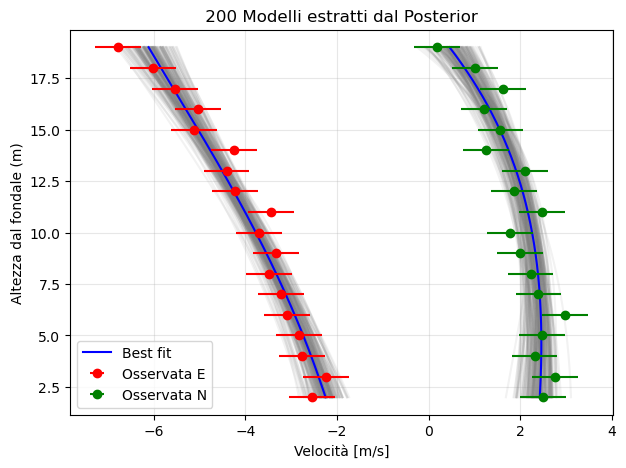

In [61]:
np.random.seed(42) # Seme impostato per la riproducibilità della simulazione
n_random = 200
indices = np.random.choice(flat_samples.shape[0], n_random, replace=False) #estrae 200 distinti valori tra 0 e (12500-500)*24

plt.figure(figsize=(7, 5))
for idx in indices:
    sample_params = flat_samples[idx, :]
    model_vals = vel(-np.arange(H - hf, H - h0 + 0.01, 0.01), *sample_params)
    plt.plot(model_vals[0, :], Modh, color='grey', alpha=0.1)
    plt.plot(model_vals[1, :], Modh, color='grey', alpha=0.1)

plt.plot(ModE, Modh, color='blue', linewidth=1.5, label='Best fit')
plt.plot(ModN, Modh, color='blue', linewidth=1.5)
plt.errorbar(meanE, h, xerr=abs(errE), fmt='o', color='red', label='Osservata E')
plt.errorbar(meanN, h, xerr=abs(errN), fmt='o', color='green', label='Osservata N')
plt.xlabel("Velocità [m/s]")
plt.ylabel("Altezza dal fondale (m)")
plt.title(" 200 Modelli estratti dal Posterior ")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Dall'analisi, si osserva che la dispersione dei modelli estratti non copre interamente la variabilità degli errori sperimentali. Questo risultato può essere attribuito a:

- **Stima errata delle incertezze**, attraverso l'ipotesi statistica assunta;
- **Fluttuazioni reali dei dati**, non previste dal modello ideale.


### Validità del Fit: Test del $\chi^2$

Per valutare la bontà del fit, viene utilizzato il **test del $\chi^2$**. Se i residui normalizzati seguono una distribuzione gaussiana standard, ci si aspetta che:

\begin{equation}
\sum_{i=1}^{19} \left[\left(\frac{q_i - Mod_i}{err_i}\right)^2_E + \left(\frac{q_i - Mod_i}{err_i}\right)^2_N \right],
\end{equation}

segua una distribuzione $\chi^2$ con aspettazione pari al numero di gradi di libertà.

Poiché ci sono in totale 38 misure e 5 parametri, il numero di gradi di libertà risulta:

\begin{equation}
n_{gdl} = 38 - 5 = 33
\end{equation}

Il modello sarà tanto adatto ai dati, quanto il valore del $\chi^2$ calcolato sarà vicino al numero dei suoi gradi di libertà gli errori.


In [64]:
def chisq(theta_params, z, current, errE, errN):
    return -2.0 * log_likelihood(theta_params, z, current, errE, errN)

chisq_BF = chisq(best_fits, z, current, errE, errN) # Calcolo il valore del chi^2
n_dof = 2 * current.shape[0] - ndim  # gradi di libertà

print("Num. di gradi di libertà:", n_dof)
print("Chi^2 best-fit =", np.round(chisq_BF, 3))

Num. di gradi di libertà: 31
Chi^2 best-fit = 12.315


Il valore di $\chi^2$ ottenuto risulta inferiore al numero di gradi di libertà. Dato che il fit non aderisce con sufficiente accuratezza a numerosi punti misurati, si può concludere che, assumendo valido il modello di Ekman, l'ipotesi sull'errore statistico porta a una notevole sovrastima dell'incertezza.



## 6. Conclusioni

L'analisi statistica condotta ha permesso di studiare l'effetto di Ekman, sulle correnti marine del Golfo di Trieste, partendo dai dati raccolti della boa VIDA della Stazione di Biologia Marina di Pirano.

I **parametri stimati** secondo il modello di Ekman per il sistema studiato risultano essere:




In [68]:
df_bf.round(2)

,Parametro,Valore Stimato,Incertezza -,Incertezza +,UdM
0,$\tau$,7.46,1.49,3.62,$N$
1,d,15.74,2.49,5.55,$m$
2,$\Phi$,0.61,0.12,0.20,$rad$
3,ug,-1.29,0.52,0.94,$m/s$
4,vg,1.09,0.51,0.26,$m/s$


Attraverso il confronto tra i dati misurati e la legge teorica, si osserva che il modello di Ekman descrive correttamente l'andamento generale delle correnti e la tendenza a formare la spirale. Tuttavia, il modello non riesce a giustificare pienamente le fluttuazioni reali, che possono derivare da:

- **Variazioni del vento**, non costante nel tempo;
- **Fenomeni reali non considerati** come gradienti di temperatura e variazioni delle correnti geostazionarie;
- **Effetti di bordo**, tipici delle zone costiere o di bacini limitati.


### Aspetti Migliorabili del Fit

Durante l'analisi sono stati identificati diversi aspetti che potrebbero contribuire a un migliore adattamento del modello alle misure.

**Qualità del DataSet**:
  - **Valutazione dell'incertezza di misura**: Disporre di una stima accurata dell'errore sperimentale delle correnti consentirebbe di migliorare la robustezza dell'analisi;
  - **Esclusione di misure al bordo**: Le misure relative a $h = 2,19 \, m$ sono inevitabilmente influenzate da effetti di bordo, non considerati dal modello, e potrebbero essere opportunamente scartate.


**Metodologia di Analisi**:
  - **Confronto di diverse implementazioni di MCMC**: Valutare metodi alternativi o configurazioni diverse di MCMC potrebbe confermare l'affidabilità delle stime;
  - **Applicazione della PCA sullo spazio dei parametri**: Eseguire una Principal Component Analysis consentirebbe di studiare le correlazioni tra i parametri e di analizzarli in modo indipendente, approfondendo la conoscenza del Posterior.
